# Detroit Open Demolitions 
### Public X Design Workshop, Detroit, Sep, 2018 
#### We are Avigail Vantu (avigailvantu@gmail.com) & Eitan Akman (eitanakman@gmail.com), we are both cities, tech and data enthusiastic based in Brookyln, NY and are very excited to be visting Detroit. 

# ****EA link to notebooks + explaining bugs and scenarios along the lab**** 

Hey there! Welcome to our workshop! 

All are welcome, and there are no prerequisiten needed to participate. Today we want to use data to better understand Detroit's demolitions policies. All of the data we will be working on in these session is released as open data - meaning it is accessible online for everyone to use. In particular, Detroit's Open Data Portal was used in this notebook descriptives and analysis: https://data.detroitmi.gov/ 

### Agenda: 
    1. Introduction: 
        a. Workshop Objectives 
        b. Intro to Open data  / databases , Jupyter, and Python
    2. Demolitions Data
    3. Demolitions Impact
        a. Crime
        b. Real estate
    4. ?? Extra 
        a. 311 data
    5. Conclusions / discussion 
    

## 1. Intro

### a. Workshop Objectives: 

### Here's a map of the Demolitions in Detroit colored by Neighborhoods  - we will be diving deep into this data very soon.  We'll munge data, visualize and plot the data. 


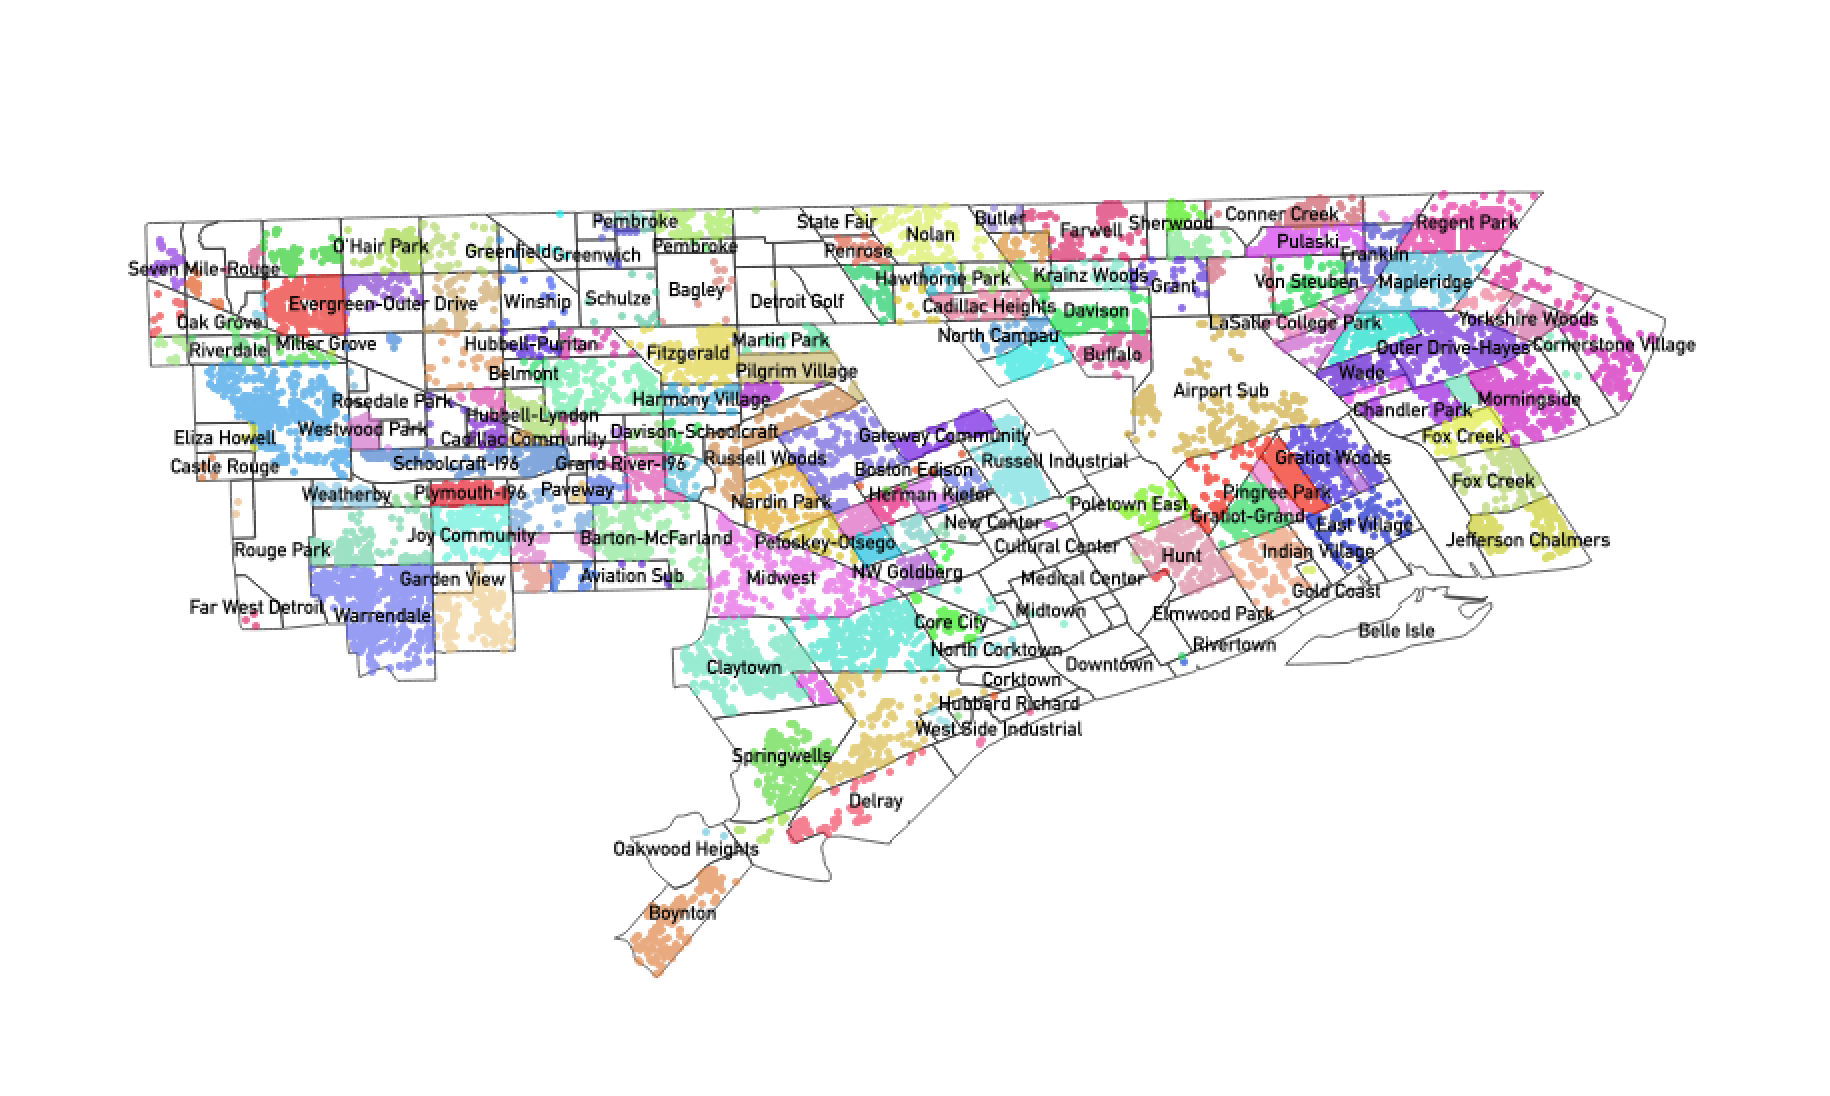

In [141]:
from IPython.display import Image
Image(filename='TotalDemoPerNighDetroit.png')


### b. Tutorials

###  But first thing first -- let's go through some core functionalities about Python Jupyter notebooks.

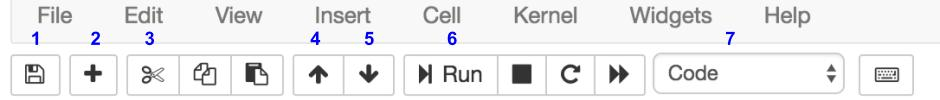

In [142]:

Image(filename='jupyter_menu.jpg')
 

### To simplify things here's a copy of the upper menu you all see in your Jupyter notebooks and it is numbered 1-7. 

- 1 simply saves your work similiar to other types of docs
- 2 is used in order to add a new IN cell 
- If you make a mistake or just don't need a specific cell anymore, press 3 to crop it. Carfeull not clicking it by accident when trying to add a cell..  
- 4 shifts the chosen cell one spot higher in your notebook and 5 does the same but toward down 
- 6 is used to run the chosen cell, this will genenrate the cell's output 
- 7 is used to change a cell's funcilnality, the two main ones we will use today is: code (defeault) and Markdown which is mainly used to write comments and titels.

#### More useful things: 

- if the notebook is stuck, or if you want to restart it - go to 'Kernel' and click - 'Restart'
- if you only want to run parts of the notebook - go to 'Cell' and choose the most suitable options: (Run All, Run All Above and Run All Bellow are some of the popular ones).
- To save a copy of your work, go to File - Download As : we recommend HTML or IPYNB to restore with viz
- To run a cell using only the keyboard press shift-return at the same time. 

#### Now, let's practice some of what we've learned: 

Please create 3 new cells

1. In the first cell: 

print ("Hello Detroit, I'm *your name* !" )

2. in the second cell: 
Sum up your birthday digits (month + day + year) 
Hint: write an equation using plus sings and exlcuding the = sign 

3. Define variable of your choice (* = number / equation) and then: print (the variable)


In [143]:
# <your code>

#### Great! 

Now change the order of the cells so that instead of 1,2,3 they are ordered 3,1,2. Got it? 

If you want to expend your Jupyter and Pandas in psrtcular knowldge we recommend strating with :http://pandas.pydata.org/pandas-docs/version/0.15.2/tutorials.html

### Coding tools, packages and languages: 
Today we will be using Python and in particular Pandas and Geopandas as toolf of data manipulation, cleaning, merging, visualzation, plotting and many more fanctionalitites that make working with big spreadhsheets easier. 

Let's import the packages we need:

In [144]:
#import packages

import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt


## 3.  Demolitions 

### Read datasets
We will be loading CSV files, which are similiar to spreadsheets and, and GeoJson which is a geographical data format mainly used to represen points and polygons.  

First let's load the demolitions data which is downloaded from the Detroit open data portal in a CSV format, Pandas will trasnform it into a DataFrame, which is a two-dimensional format ( bascially columns and rows). Values can be numeric, string, boolean etc.

In [145]:
#load Demolitions data 
demolitions = pd.read_csv('Detroit_Demolitions.csv')

In [146]:
demolitions.Neighborhood.unique()

array(['Delray', 'Claytown', 'Chadsey Condon', 'Conant Gardens',
       'Boynton', 'Airport Sub', 'Grant', 'Nortown', 'Cadillac Community',
       'Riverbend', 'Mapleridge', 'Petoskey-Otsego', 'Morningside',
       'Gateway Community', 'North Rosedale Park', 'Fitzgerald/Marygrove',
       'Holcomb Community', 'North End', 'Herman Kiefer', 'Nolan',
       'Grixdale Farms', 'Campau/Banglatown', 'Penrose',
       'Cadillac Heights', 'McDougall-Hunt', 'Oakman Blvd Community',
       'Pilgrim Village', 'Dexter-Linwood', 'Chalfonte',
       'Schoolcraft Southfield', 'Central Southwest',
       'Gratiot Town/Ketterring', 'Poletown East', 'Midwest', 'Davison',
       'Springwells', 'Franklin Park', 'Old Redford', 'Five Points',
       'Joy Community', 'Greenfield', 'We Care Community', 'Franklin',
       'Regent Park', 'Brightmoor', 'Chandler Park-Chalmers', 'Fiskhorn',
       'Warren Ave Community', 'Evergreen-Outer Drive', 'Paveway',
       'Westwood Park', 'Chandler Park', 'Pulaski', 'Yorks

Demolitions

In [147]:
#how many demolitions over the years 2014-2018
print ("The total number of demolitions is:",len(demolitions))

The total number of demolitions is: 14524


### Data Cleaning 

In [148]:
# remove NaN's  
demolitions = demolitions.dropna()

### Demolitions Cost 

In [149]:
print ("The total price of demolitions is $" + str(demolitions['Price'].sum() / 1000000)+"M")

The total price of demolitions is $228.31201243M


In [150]:
#group by neighborhoods to have the total price for demolitions for each
dem = demolitions.groupby(['Neighborhood']).sum()

### dem is a DF with USD spent on demolitions by neighborhood 

In [151]:
#let's see how does it looks like
dem.head(4)

,Price,Council_District,Latitude,Longitude
Neighborhood,,,,
Airport Sub,3942161.75,714,9242.481514,-18099.234705
Aviation Sub,64718.40,28,169.423262,-332.650528
Bagley,167511.00,20,424.264473,-831.466834
Barton-McFarland,3174172.63,1340,8133.953885,-15967.729907


This dataframe summs up all numerical columns (price, council district, Lat, Lon). However, except for price, all columns agragated this way actually have no meaning so they are noise we actually want to remove from the data. 
Let's do that:



In [152]:
# delete columns 

del dem['Council_District']
del dem['Latitude']
del dem['Longitude']


dem.head()

,Price
Neighborhood,
Airport Sub,3942161.75
Aviation Sub,64718.40
Bagley,167511.00
Barton-McFarland,3174172.63
Belmont,105975.52


Now that looks better, but let's try to better understand the cost of demolitions by neighborhood. Eyeballing the dataframe makes it a little hard to come up with meaningful conclusions..  
Ploting the data will make it easier to grasp. Let's do it 


In [153]:
# first thing first: in the group.by process the column we grouped on (i.e.  neighborhood) 
#colapses into the DataFrame index.
# to make it easiar to interact with let's create a new column which equals to the index (== Neighborhood)
dem['Neighborhood'] = dem.index
#let's see how it looks like: 
print (dem.head())

                       Price      Neighborhood
Neighborhood                                  
Airport Sub       3942161.75       Airport Sub
Aviation Sub        64718.40      Aviation Sub
Bagley             167511.00            Bagley
Barton-McFarland  3174172.63  Barton-McFarland
Belmont            105975.52           Belmont


Beautiful

In [154]:
# now let's sort the data so that the lowest priced neighborhood will apear first 
#dem = dem.sort_values(by='Price')

In [155]:
print ("four least demolitions funded neighborhoods in Detroit are:",dem.head(4))
print ("four most demolitions funded neighborhoods in Detroit are:",dem.tail(4))

four least demolitions funded neighborhoods in Detroit are:                        Price      Neighborhood
Neighborhood                                  
Airport Sub       3942161.75       Airport Sub
Aviation Sub        64718.40      Aviation Sub
Bagley             167511.00            Bagley
Barton-McFarland  3174172.63  Barton-McFarland
four most demolitions funded neighborhoods in Detroit are:                       Price     Neighborhood
Neighborhood                                
Wildemere Park   2006139.62   Wildemere Park
Winship           156360.45          Winship
Woodbridge        317551.00       Woodbridge
Yorkshire Woods  1301885.00  Yorkshire Woods


In [222]:
# The most money for demolitions was spent in Warrendale :$9,494,484 Millions
dem[dem['Price'] ==9494484.319999998]

,Price,Neighborhood
Neighborhood,,
Warrendale,9494484.32,Warrendale


### Task I: 
Can you try and calculate the mean cost of demolitions per neighborhood? 

Hint: use dem as your work dataframe, "Price" is the column which we want to get the mean of
* you may want to use this function: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.mean.html

In [156]:
# <your code> 



So we can see that more than 9 Million USD were spent on demolitions in the neoghborhood of Warrendale, and only 9,000 USD were sepent in Greenwich

### Number of Demolitions per Neighborhood

In [157]:
#Aggragate number of demolitions by neighborhood 

demolitionsnum = demolitions.groupby(['Neighborhood']).count()

In [158]:
# re organize DataFrame

demolitionsnum['Neighborhood'] = demolitionsnum.index
demolitionsnum['DemCount'] = demolitionsnum['Address']


In [159]:
# remove all columns but the relelvent ones
demolitionsnum = demolitionsnum[['Neighborhood','DemCount']]

In [160]:
#see how this looks like
demolitionsnum.head()

,Neighborhood,DemCount
Neighborhood,,
Airport Sub,Airport Sub,218
Aviation Sub,Aviation Sub,4
Bagley,Bagley,10
Barton-McFarland,Barton-McFarland,192
Belmont,Belmont,8


In [225]:
#demolitionsnum['DemCount'].max() 

# the most demolitions condeucted in Warrendale - 653
demolitionsnum[demolitionsnum['DemCount'] ==653]

,Neighborhood,DemCount
Neighborhood,,
Warrendale,Warrendale,653


In [161]:
# normalize Demolitions counts by area size of neighborhood 
#to get size load neighborhoods ploygons 
DetroitNeighborhoods = gpd.read_file('DetroitNeighborhoods.geojson')
#see how the DataFrame looks like 
DetroitNeighborhoods.head()

,acres,shape_area,join_count,district_nu,objectid_1,nhood_num,objectid,shape_leng,nhood_name,new_nhood,neighborho,target_fid,shape_le_1,geometry
0,1086.49884204,31710328.0781,3,4,1,75,1,27277.0743136,Gratiot Woods,West End,103,1,31380.7300469,(POLYGON ((-82.9915246858219 42.38438953003659...
1,496.783595203,21639806.8475,1,4,2,25,2,18822.43192,Chandler Park,Chandler Park,105,2,18822.43192,(POLYGON ((-82.97584899959158 42.3893319996678...
2,1159.77563198,31188710.5449,1,4,3,60,3,30500.9332741,Fox Creek,Riverbend,100,3,22537.8470224,(POLYGON ((-82.96784188332737 42.3836942899373...
3,901.711919191,39278414.0858,2,4,4,97,4,25466.5795687,Jefferson Chalmers,Jefferson Chalmers,101,4,25466.5795687,(POLYGON ((-82.95140600040769 42.3550279999058...
4,964.17407249,41999254.6002,1,4,5,123,5,26596.6920683,Morningside,Morningside,97,5,26596.6920683,(POLYGON ((-82.94664400037011 42.3874689998093...


In [162]:
#re organize data: 
# 1. unify column name 
DetroitNeighborhoods['Neighborhood'] = DetroitNeighborhoods['new_nhood']
# 1. only leave neighborhood and area: 
DetroitNeighborhoods = DetroitNeighborhoods[['Neighborhood','acres']]
#3. round the "acres" 
#DetroitNeighborhoods['acres'].round()
#see how it looks like
DetroitNeighborhoods.head()

,Neighborhood,acres
0,West End,1086.49884204
1,Chandler Park,496.783595203
2,Riverbend,1159.77563198
3,Jefferson Chalmers,901.711919191
4,Morningside,964.17407249


In [163]:
# merge
Demolition_Area = pd.merge(DetroitNeighborhoods,  demolitionsnum, on = 'Neighborhood', how = "inner")

# convert data type to float to avoid issues manipulating later
Demolition_Area['acres'] = (Demolition_Area['acres']).astype('float64')

#see how looks like
Demolition_Area.head()

/Users/avigailvantu/anaconda2/envs/myenv/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2961: FutureWarning: 'Neighborhood' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  exec(code_obj, self.user_global_ns, self.user_ns)


,Neighborhood,acres,DemCount
0,West End,1086.498842,194
1,Chandler Park,496.783595,98
2,Riverbend,1159.775632,131
3,Jefferson Chalmers,901.711919,189
4,Morningside,964.174072,315


In [164]:
len(Demolition_Area)

173

In [165]:
# Normalize calculate per number of demolitions / area * 100 
Demolition_Area['normalized_demo'] = (Demolition_Area['DemCount'] /  Demolition_Area['acres']*100 )
# see how it looks like: 
Demolition_Area.head()

,Neighborhood,acres,DemCount,normalized_demo
0,West End,1086.498842,194,17.855518
1,Chandler Park,496.783595,98,19.726899
2,Riverbend,1159.775632,131,11.295288
3,Jefferson Chalmers,901.711919,189,20.960131
4,Morningside,964.174072,315,32.670449


Text(0.5,1,'Detroit neighbohorhoods most number of demolitions by area')

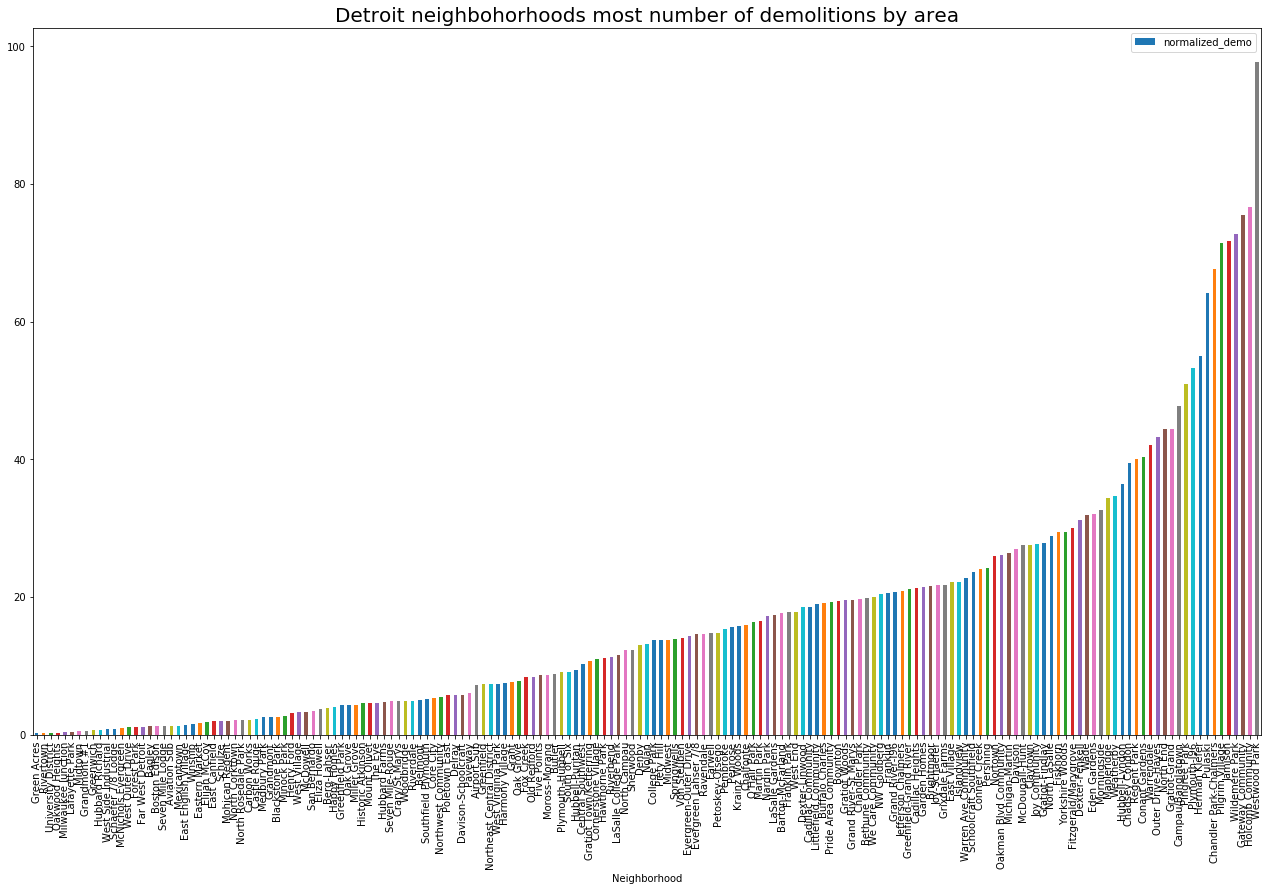

In [166]:
#Let's sort and plot demolitions by nieghborhood
# clean DF again:
Demolition_Area = Demolition_Area[['Neighborhood','normalized_demo']]

# sort: 

Demolition_Area = Demolition_Area.sort_values(by='normalized_demo')

#plot : figure size, and then define which data are we ploting 

ax = Demolition_Area.plot.bar(x='Neighborhood', y='normalized_demo',figsize=(22,13))
plt.title('Detroit neighbohorhoods most number of demolitions by area',  fontsize=20)



This is cool but the number of hoods make it very tiny and hard to derive information from. 

In [167]:
#let's see how many neghbohoords do we actually have 
len(Demolition_Area)


173

let's try and plot the top 20% 

In [168]:
Demolition_Area_tail = Demolition_Area.tail(34)
Demolition_Area_tail.head()

,Neighborhood,normalized_demo
49,McDougall-Hunt,27.501335
25,Claytown,27.572305
94,Joy Community,27.782588
131,Gratiot-Findlay,27.892295
66,North LaSalle,28.942991


In [169]:
Demolition_Area_tail.tail(10)

,Neighborhood,normalized_demo
122,Plymouth-I96,53.312289
161,Herman Kiefer,55.077312
60,Pulaski,64.184499
135,Chandler Park-Chalmers,67.633615
82,Pilgrim Village,71.389137
106,Jamison,71.724919
105,Wildemere Park,72.709048
123,Gateway Community,75.550598
148,Holcomb Community,76.665016
16,Westwood Park,97.774907


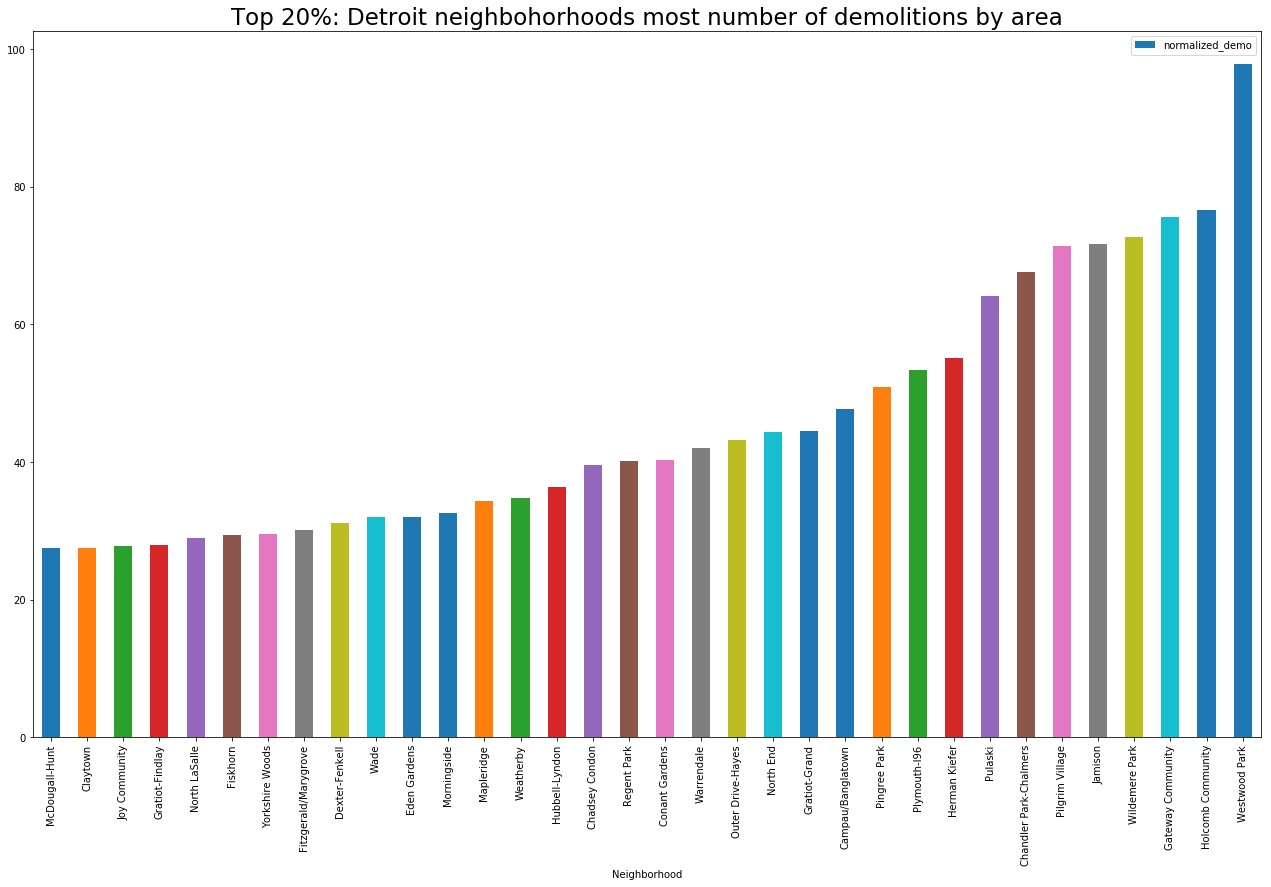

In [170]:

ax = Demolition_Area_tail.plot.bar(x='Neighborhood', y='normalized_demo',figsize=(22,13))
plt.title('Top 20%: Detroit neighbohorhoods most number of demolitions by area',  fontsize=23)

#plt.figure(figsize=(37,13))
#plt.title('Top 20% Detroit neighbohorhoods most demolitions spending',  fontsize=27)
#dem['Price'].plot.bar(stacked=False, fontsize=24)

plt.show()

## Plot Demolitions 

In [172]:
from shapely.geometry import Point

In [173]:
# Demolitions DF to GeoDF 

from shapely.geometry import Point

geometry = [Point(xy) for xy in zip(demolitions.Longitude, demolitions.Latitude)]
demolitions = demolitions.drop(['Longitude', 'Latitude'], axis=1)
crs = {'init': 'epsg:4326'}


In [174]:
#create a new DataFrame for the geo points 
gdf = gpd.GeoDataFrame(demolitions, crs=crs, geometry=geometry)

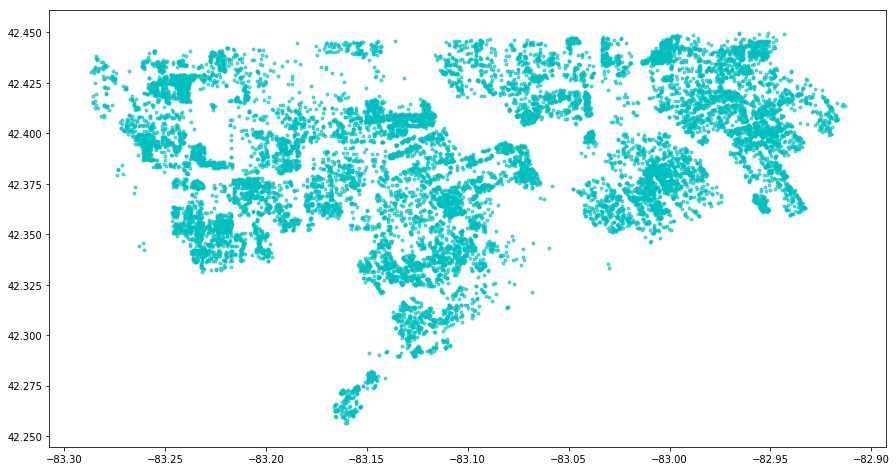

In [175]:

f, ax = plt.subplots(1,figsize = (15,16))
gdf.plot(c='c',marker='.',ax=ax, alpha=0.6)
plt.show()

## 3. Demolitions impact

### how can we measure a policy imapct and inform ourselves  or desicion makers?

### a. Crime
We want to learn more about how Detroit's neighborhoods were influnced by the demolitions policy over time. As the policy was first intruduced in 2014 and are ongoing until now - 2018, we'd need to evaluate impact by comparing a specific varaible that might have been influnced in the period when the demolitions were conducted. 

Let's check out crime levels in Detroit's neighbohoods. We will use data from Detroit's open data portal for 2013 (to reflect crime levels during baseline - just before the policy was introduced) and 2017 (the most recent full year). 

Since the crime incidents open datasets have changes in format over time and since our lab has time, and computation power limitations we have manipulated the 2013 and 2017 datasets ahead of time and combined them into one cleaned CSV file grouoped by neighborhood level. 

## ** If you are intrested to see the data cleaning process you can check out this repo  
https://github.com/avigailvantu/Detroit-prep

The raw data icludes All Crime Incidents for 2013 and 2017 and is available here: 

https://data.detroitmi.gov/browse?q=crime&sortBy=relevance

In [176]:
#Loading Crime Data
DetCrime = pd.read_csv('DetCrime13_17.csv')
#clean duplicated column
del DetCrime['Unnamed: 0'] 
#show data
DetCrime.head(4)

,Neighborhood,Incidents17,Incidents13
0,West End,352,693
1,Chandler Park,346,405
2,Riverbend,487,675
3,Jefferson Chalmers,468,654


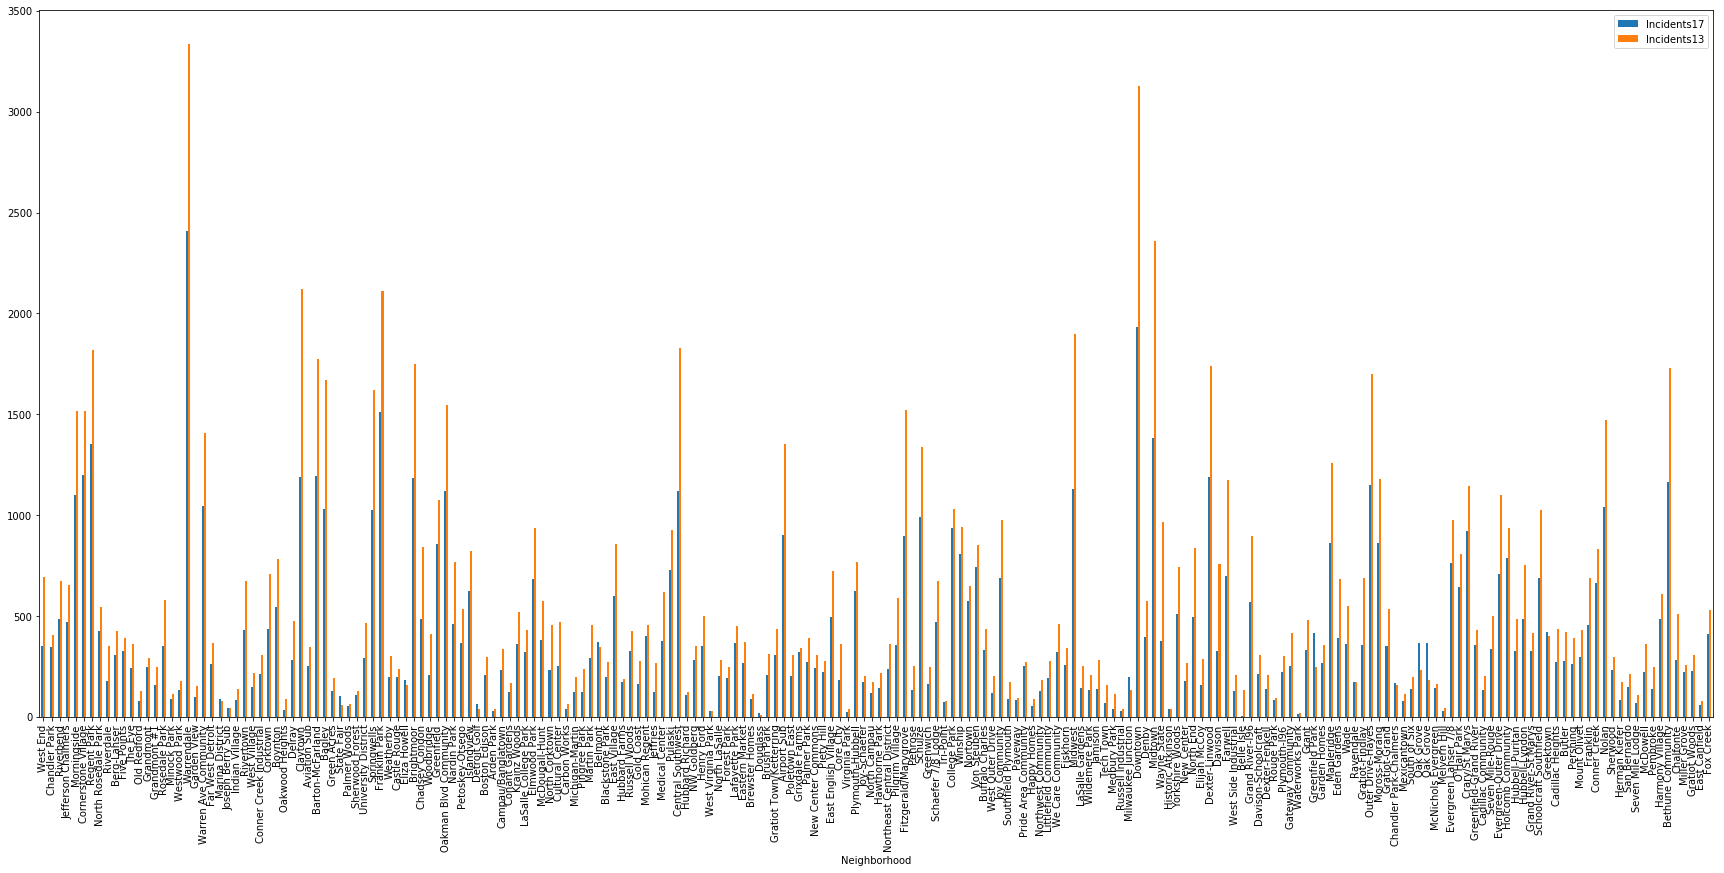

In [177]:

DetCrime.plot(x="Neighborhood", y=["Incidents17", "Incidents13"], kind="bar", figsize=(30,13))


In [178]:
# calcaulte crime precentage change between 2013 and 2017 

# we will apply to formula:    (new year – old year)/old year and then multiply the reault by 100.

# In our case: (incindets 2017) minus (incidents 2013) divided by (incidents 2013) , and multiplaid by 100
DetCrime['P_ChangeC'] = ((DetCrime['Incidents17'] - DetCrime['Incidents13']) / (DetCrime['Incidents13'] )* 100)

#how does it look like:
DetCrime.head()

,Neighborhood,Incidents17,Incidents13,P_ChangeC
0,West End,352,693,-49.206349
1,Chandler Park,346,405,-14.567901
2,Riverbend,487,675,-27.851852
3,Jefferson Chalmers,468,654,-28.440367
4,Morningside,1102,1514,-27.212682


In [179]:
DetCrime.head()

,Neighborhood,Incidents17,Incidents13,P_ChangeC
0,West End,352,693,-49.206349
1,Chandler Park,346,405,-14.567901
2,Riverbend,487,675,-27.851852
3,Jefferson Chalmers,468,654,-28.440367
4,Morningside,1102,1514,-27.212682


Is this plot providing valauable infomration? , if not, can you think of a different way to use this infomration to derieve a better understanding about Detroit's crime level related to the demolitions data? 

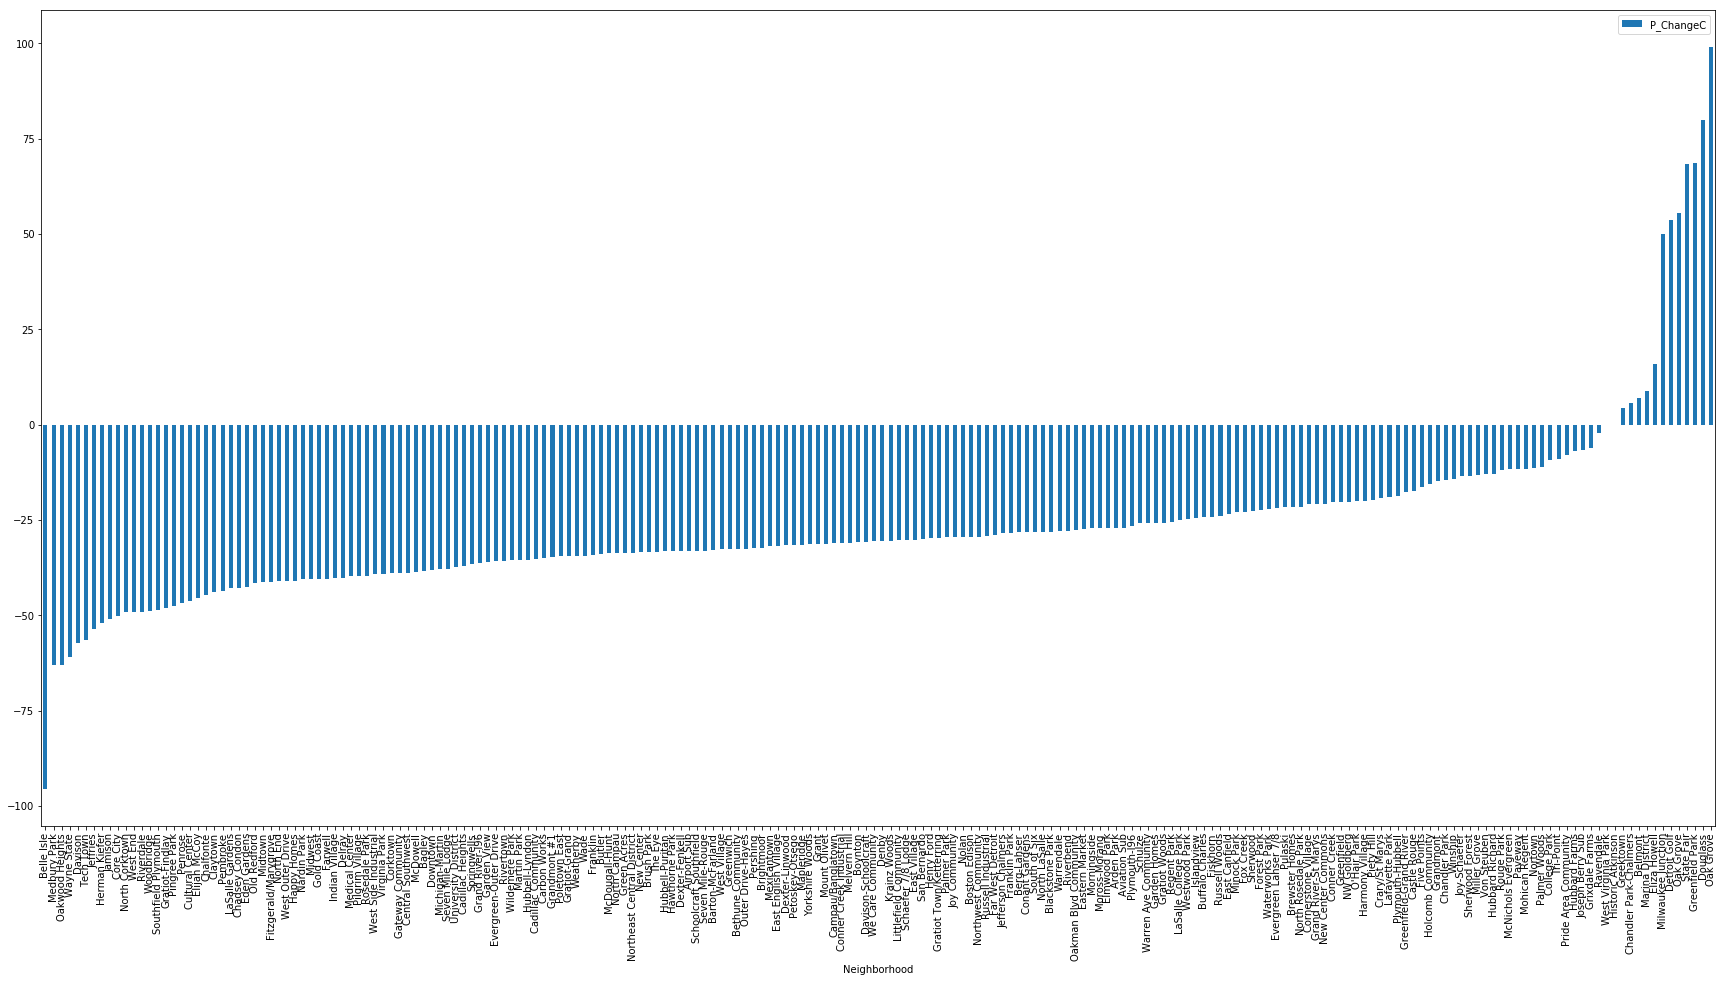

In [180]:

#Sort
DetCrime = DetCrime.sort_values(by='P_ChangeC')
#plot
DetCrime.plot(x="Neighborhood", y=["P_ChangeC"], kind="bar", figsize=(30,15))

In [181]:
# merge with demolitions data and look into the 20%

In [182]:
# sort 2017 
#dem = dem.sort_values(by='Price')
#DetCrime = DetCrime.sort_values(by='Incidents17')

# plot 2017

#plt.figure(figsize=(33,15))
#plt.title('2017 crime levels in Detroit per Neighborhood',  fontsize=27)
#DetCrime['Incidents17'].plot.bar(stacked=False, fontsize=24)
#plt.show()

#sort 2013 

#plt.figure(figsize=(33,15))
#plt.title('2013 crime levels in Detroit per Neighborhood',  fontsize=27)
#DetCrime['Incidents13'].plot.bar(stacked=False, fontsize=24)

#plt.show()

In [183]:
#DetCrime

#group by Neighborhood name again, but this time count and not sum 
#dem2 = demolitions.groupby(['Neighborhood']).count()

In [184]:
#dem2.head()

Basically each one of the columns reflects number of incidents since we applied a "count" 



In [185]:
#let's combine the Demolitions count to the crime data

#DetCrime['NumDemolitions'] = dem2['Address']

In [186]:
#dem2['NumDemolitions'] = dem2['Address']  

In [187]:
# merge crime and demolitions data 
DetCrimeFinal = pd.merge(DetCrime,  Demolition_Area , on = 'Neighborhood', how = "inner")
DetCrimeFinal.head()

,Neighborhood,Incidents17,Incidents13,P_ChangeC,normalized_demo
0,Medbury Park,41,111,-63.063063,2.514629
1,Oakwood Heights,33,89,-62.921348,0.322574
2,Davison,324,756,-57.142857,26.950342
3,Herman Kiefer,83,173,-52.023121,55.077312
4,Jamison,138,281,-50.889680,71.724919


In [188]:
#a = {'Neighborhood': DetDemCrimeMerge['Neighborhood'] , 'Incidents17': DetDemCrimeMerge['Incidents17'], 'Incidents13': DetDemCrimeMerge['Incidents13'],'NumDemolitions': DetDemCrimeMerge['NumDemolitions_y']}
#DetCrimeFinal = pd.DataFrame(data=a)

In [189]:
# DetCrimeFinal is the merged data for crime incicdents in 2013 / 2017 and the number of demolitions
#DetCrimeFinal.tail(1)

In [190]:
# calcaulte crime precentage change between 2013 and 2017 

# (incindets 2017) minus (incidents 2013) divided by (incidents 2013)  multiplaid by 100
#DetCrimeFinal['P_Change'] = ((DetCrimeFinal['Incidents17'] - DetCrimeFinal['Incidents13']) / (DetCrimeFinal['Incidents13'] )* 100)

In [191]:
#DetCrimeFinal.tail()

In [192]:
#plt.figure(figsize=(33,15))
#plt.title('2013-2017  crime P_Change',  fontsize=27)
#DetCrimeFinal['P_Change'].plot.bar(stacked=False, fontsize=24)

In [193]:
#sort
#DetCrimeFinal = DetCrimeFinal.sort_values(by='NumDemolitions')

In [194]:
#DetCrimeFinal.tail(3)

In [195]:
# some descriptives about the % change
#print ("Describe", DetCrimeFinal.P_Change.describe())

In [196]:
#DetCrimeFinal[DetCrimeFinal["P_Change"] >  -27.438609]

### b. Real Estate

In [197]:
#Load data:
ParcelSale = pd.read_csv('Sales13_17.csv')
#show data
ParcelSale.head()

,Unnamed: 0,Neighborhood,MeanSale17,MeanSale13
0,0,Airport Sub,28121.0,13773.0
1,1,Arden Park,244500.0,50000.0
2,2,Aviation Sub,41075.0,36986.0
3,3,Bagley,58610.0,32598.0
4,4,Barton-McFarland,32127.0,32816.0


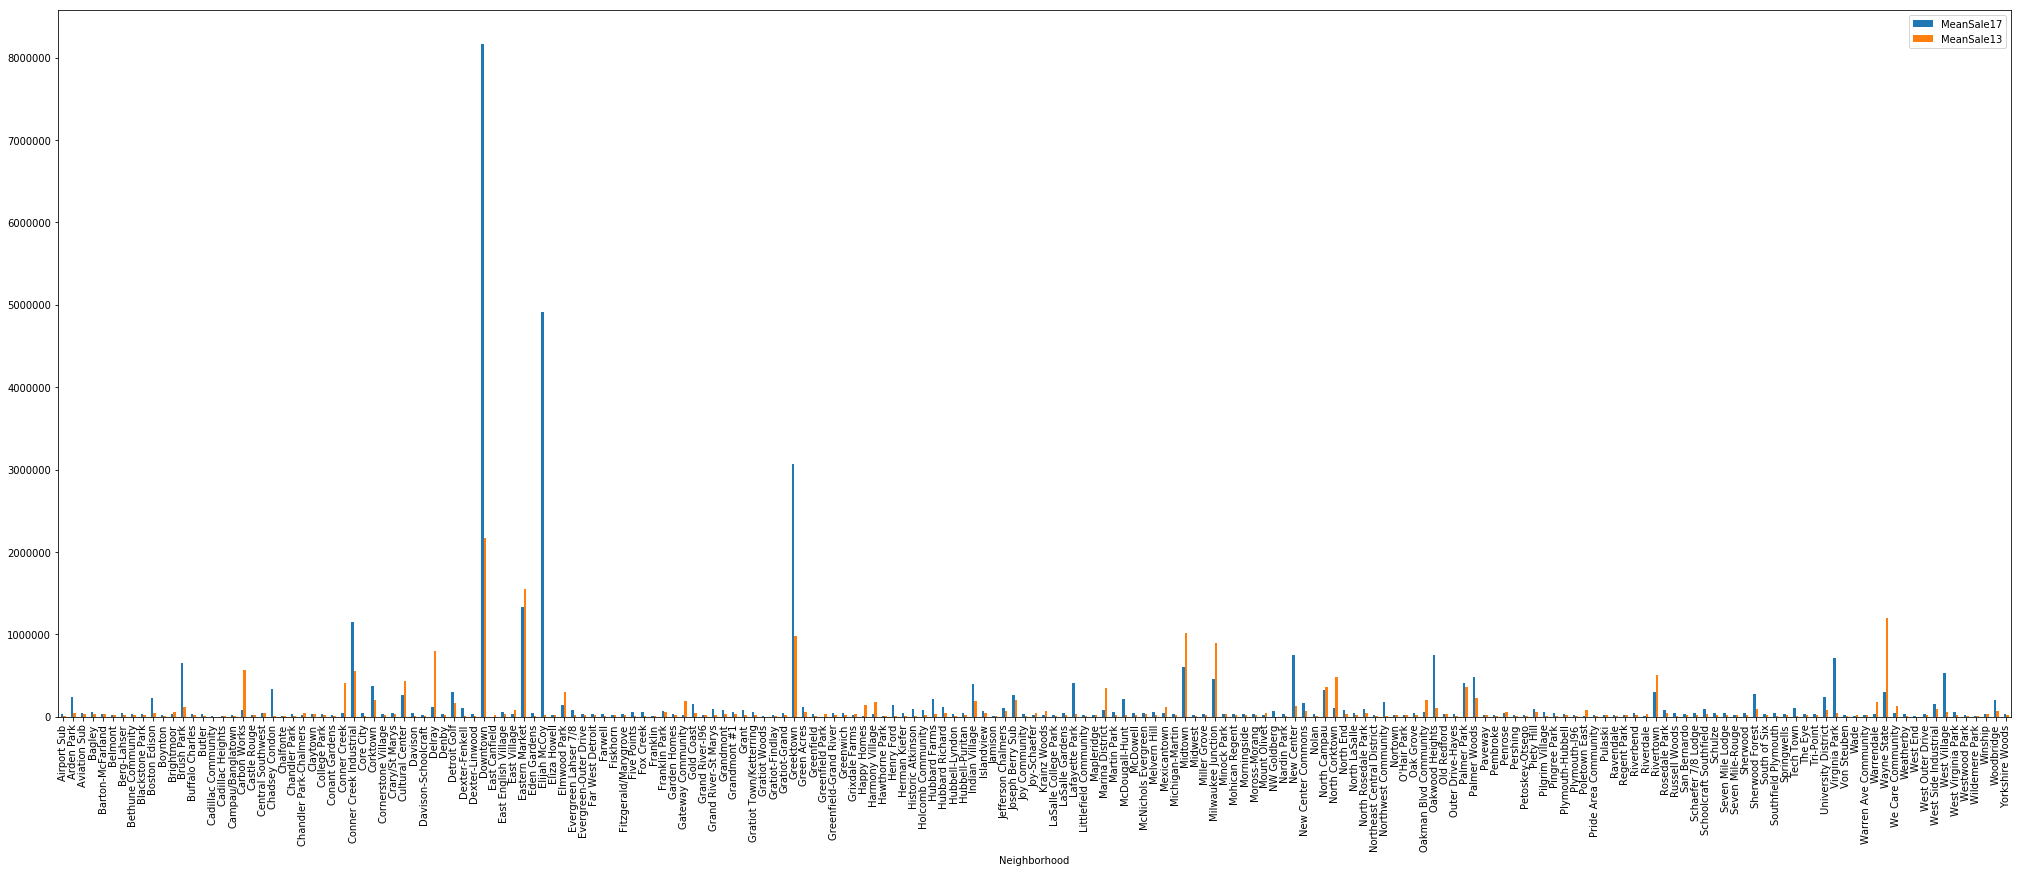

In [198]:
#Plot data 
ParcelSale .plot(x="Neighborhood", y=["MeanSale17", "MeanSale13"], kind="bar", figsize=(35,13))


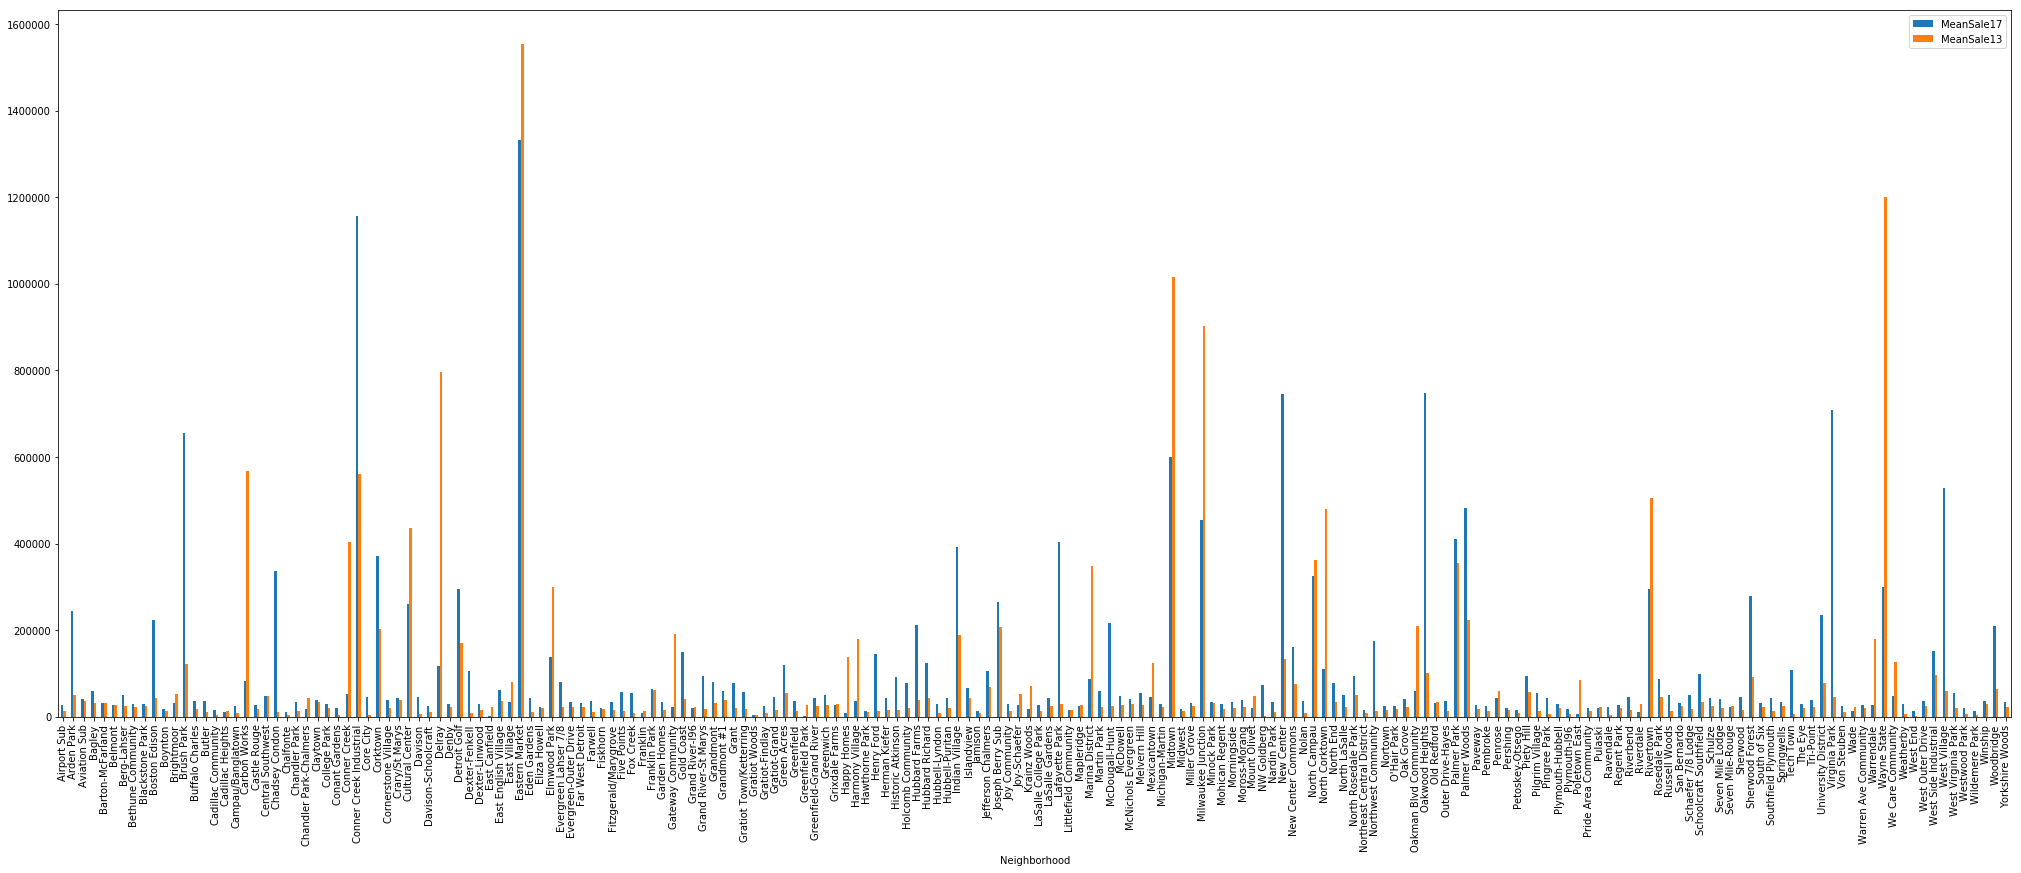

In [199]:
#remove outliers for plotting: 
ParcelSaleoutl = ParcelSale[ParcelSale["MeanSale17"]  < 2000000 ]
ParcelSaleoutl.plot(x="Neighborhood", y=["MeanSale17", "MeanSale13"], kind="bar", figsize=(35,13))


## Housing Prices Calculate % Change

In order to try and make conclusions about the impact of the demolitions policy on parcel sales in Detroit we want to clacluate % change, similrarly to how we worked with the crime data. Note that we are not adjusting sale rates to inflation and the fact that $X 4 years ago are worth less than $X today.  

### Task 3: 
Your task is to calculate the precentage change from 2013 (baseline) to 2017 (most recent year) 
Hint 1: remember the formula we applied on crime:   

(new year – old year)/old year and then multiply the reault by 100.

In our case: (mean sale rate 2017) minus (mean sale rate 2013) divided by (mean sale rate 2013) , and multiplaid by 100

Hint 2: if you are stuck try going back to the crime % change calculation

* use ParcelSale as your DataFrame


In [200]:
<your code>

SyntaxError: invalid syntax (<ipython-input-200-8b5630e8b847>, line 1)

In [201]:
#can remove later

ParcelSale['P_ChangeR'] = ((ParcelSale['MeanSale17'] - ParcelSale['MeanSale13']) / (ParcelSale['MeanSale13'] )* 100)

#how does it look like:
ParcelSale.head()

,Unnamed: 0,Neighborhood,MeanSale17,MeanSale13,P_ChangeR
0,0,Airport Sub,28121.0,13773.0,104.174835
1,1,Arden Park,244500.0,50000.0,389.000000
2,2,Aviation Sub,41075.0,36986.0,11.055535
3,3,Bagley,58610.0,32598.0,79.796307
4,4,Barton-McFarland,32127.0,32816.0,-2.099586


In [202]:
## merge with demolitions and data and crime 
DetCrimeSale = pd.merge(DetCrimeFinal,  ParcelSale, on = 'Neighborhood', how = "inner")

DetCrimeSale.head()

,Neighborhood,Incidents17,Incidents13,P_ChangeC,normalized_demo,Unnamed: 0,MeanSale17,MeanSale13,P_ChangeR
0,Oakwood Heights,33,89,-62.921348,0.322574,137,747500.0,102207.0,631.358909
1,Davison,324,756,-57.142857,26.950342,35,44969.0,5606.0,702.158402
2,Herman Kiefer,83,173,-52.023121,55.077312,84,42338.0,14967.0,182.875660
3,Jamison,138,281,-50.889680,71.724919,93,13858.0,8812.0,57.262823
4,Core City,180,362,-50.276243,5.283303,30,44944.0,5180.0,767.644788


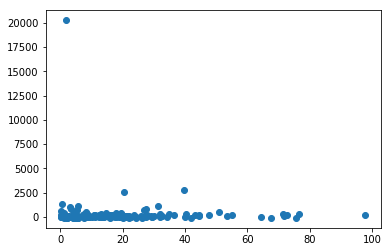

In [215]:
#sort again by number of demolitions 
DetCrimeSale = DetCrimeSale.sort_values(by='normalized_demo')

# and plot


plt.scatter(DetCrimeSale['normalized_demo'], DetCrimeSale['P_ChangeR'])
plt.show() 
#DetCrimeSale.plot(x="normalized_demo", y="P_ChangeR",style='o', figsize=(35,13))
#df.plot(x='col_name_1', y='col_name_2', style='o')

In [206]:
DetCrimeSale.head()

,Neighborhood,Incidents17,Incidents13,P_ChangeC,normalized_demo,Unnamed: 0,MeanSale17,MeanSale13,P_ChangeR
58,Green Acres,128,193,-33.678756,0.281296,74,119340.0,53983.0,121.069596
43,Rivertown,432,671,-35.618480,0.283819,159,296091.0,504758.0,-41.340008
38,University District,291,465,-37.419355,0.309574,176,234482.0,76946.0,204.735789
0,Oakwood Heights,33,89,-62.921348,0.322574,137,747500.0,102207.0,631.358909
167,Milwaukee Junction,198,132,50.000000,0.395903,115,453625.0,901760.0,-49.695595


In [217]:
DetCrimeSale = [DetCrimeSale[DetCrimeSale['P_ChangeR']<500]
                


SyntaxError: unexpected EOF while parsing (<ipython-input-217-a3c28d2f7207>, line 2)

## 4. ?? 311 improve detroit demolitions related data

### Task 4: individual exploration 

## 5. Conclusions / Discussion  

## 6. Survey 


#### Thank you for participating in our workshop! It would be very helpful for us if you could take a few minutes to fill out a survey to provide feedback about your experience. 

Q1. Did you had any previous data analytics / visualizations experience? 

< your answer>

Q2. Are you from Detroit or very familiar with the city?  

< your answer>

Q3. What is the most interesting thing you learned throughout the workshop ? 

< your answer>

Q4. Why were you drawn to this Open Demolitions workshop in the first place?  

< your answer>

Q5. Did the workshop fulfil your what you hoped to achieve?   

< your answer>

Q6. If you could add one more section to the workshop, what would that be? 

< your answer>

### Thank You! 